In [1]:
# Install PyCaret in Google Colab
!pip install pycaret

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.clustering import *


In [2]:
# Load the dataset
file_path = '/content/Mall_Customers.csv'
mall_customers_df = pd.read_csv(file_path)

# Display the first few rows
print(mall_customers_df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# EDA
# Descriptive statistics
print(mall_customers_df.describe())
print(mall_customers_df['Genre'].value_counts())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
Female    112
Male       88
Name: Genre, dtype: int64


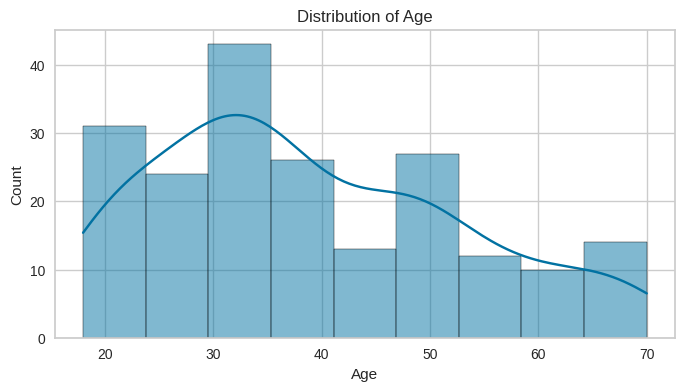

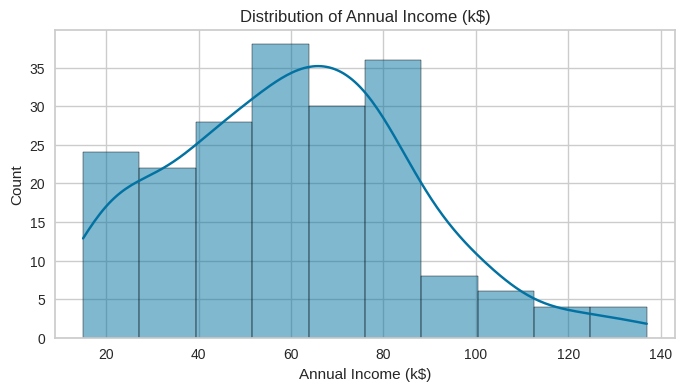

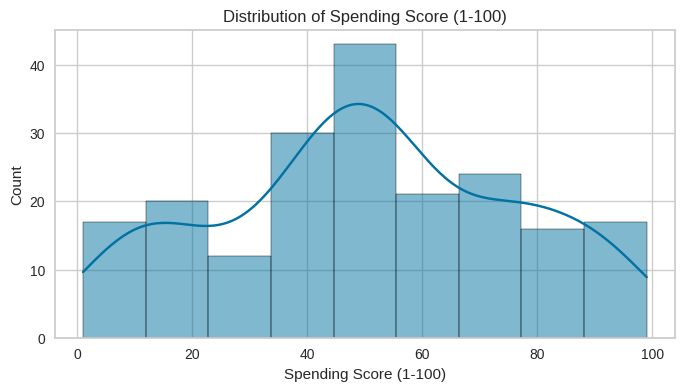

In [4]:
# Histograms and Density Plots
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(8, 4))
    sns.histplot(mall_customers_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

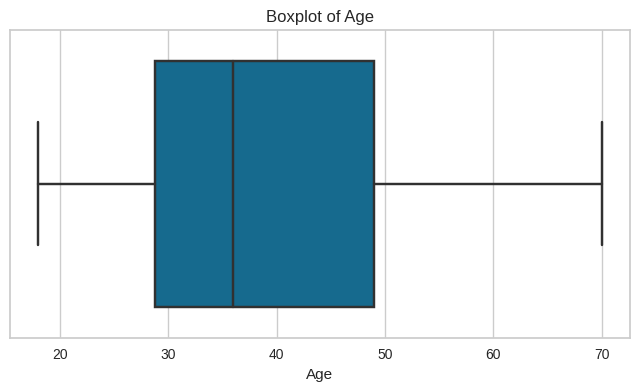

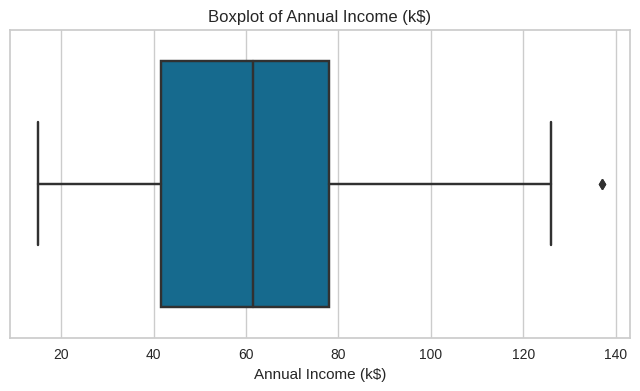

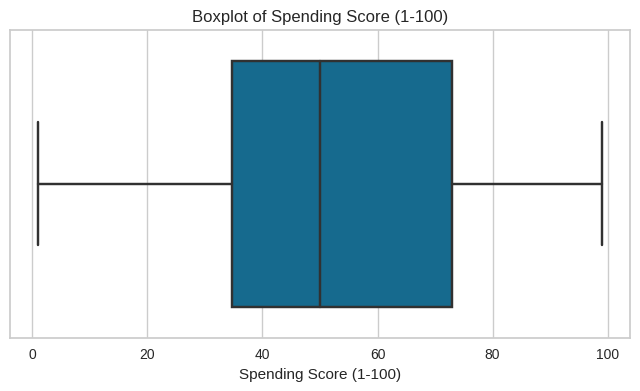

In [5]:
# Boxplots
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=mall_customers_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

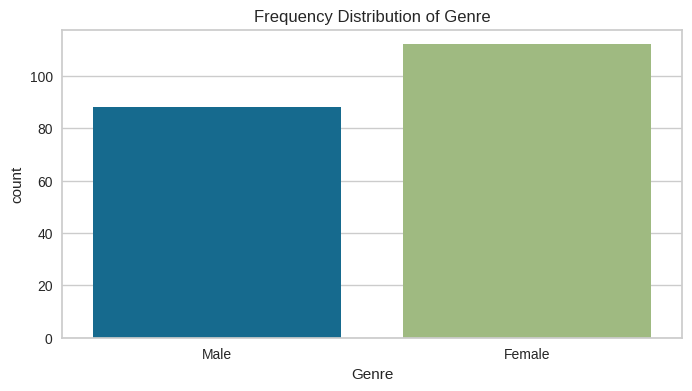

In [6]:
# Bar Chart for Categorical Feature
plt.figure(figsize=(8, 4))
sns.countplot(x='Genre', data=mall_customers_df)
plt.title('Frequency Distribution of Genre')
plt.show()

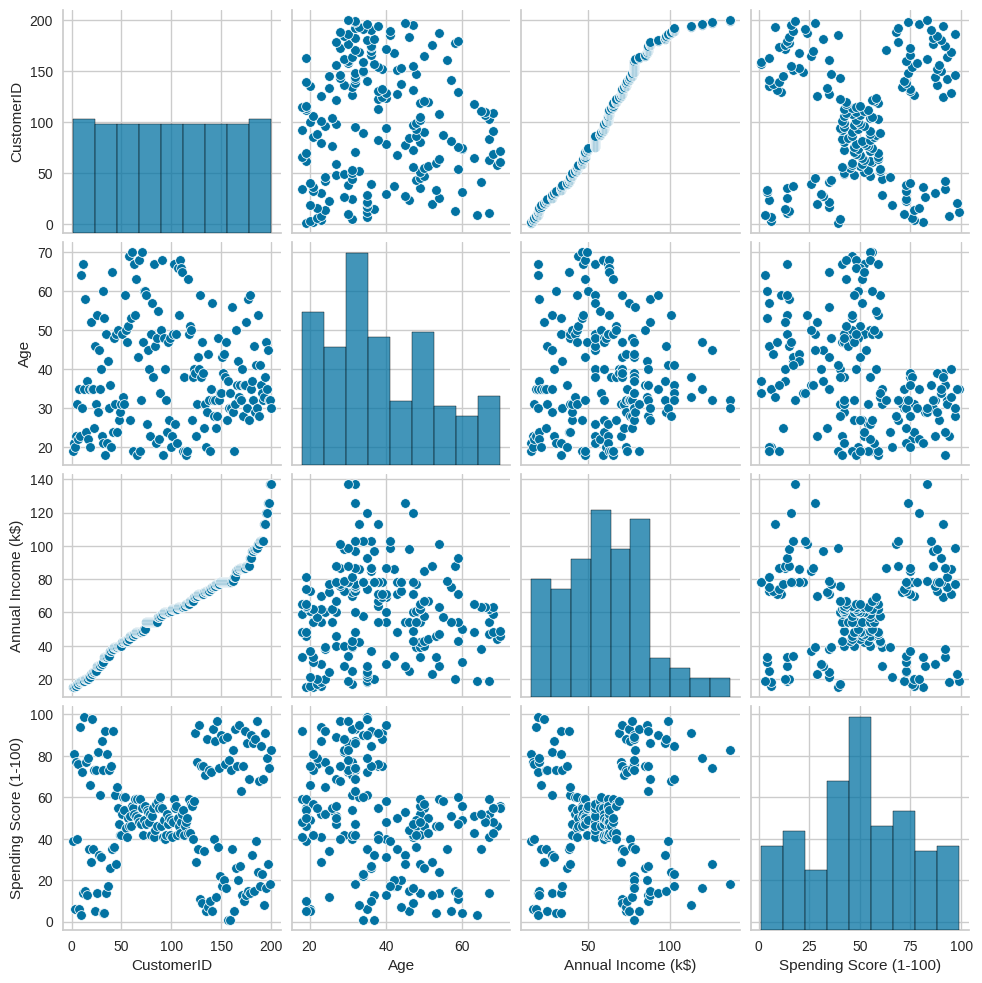

In [7]:
# Pair Plot
sns.pairplot(mall_customers_df)
plt.show()

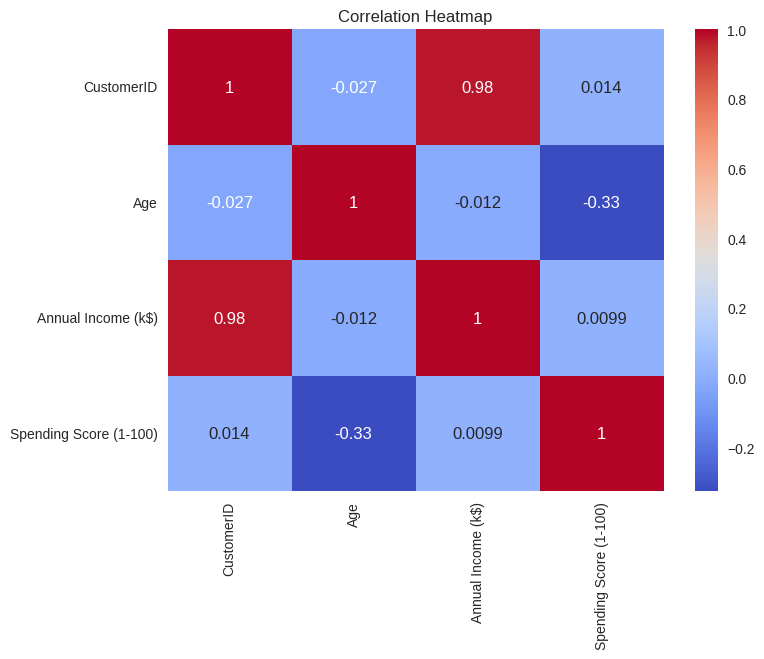

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mall_customers_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# DBSCAN Clustering using PyCaret
# Setting up the environment in PyCaret and excluding 'CustomerID'
!pip install mlflow

clustering_setup = setup(data = mall_customers_df.drop(columns=['CustomerID']),
                         session_id=123,
                         normalize=True,
                         log_experiment=True)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Ordinal features,1
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


2023/11/14 23:30:01 INFO mlflow.tracking.fluent: Experiment with name 'cluster-default-name' does not exist. Creating a new experiment.


In [10]:
# Creating the DBSCAN model
dbscan_model = create_model('dbscan', eps = 0.5, min_samples = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0120,12.0994,1.3894,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

2023/11/14 23:30:20 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [11]:
# Assigning the clusters to the dataset
dbscan_results = assign_model(dbscan_model)

In [12]:
# Analyzing the clusters
# Count of data points in each cluster
print(dbscan_results['Cluster'].value_counts())

Cluster -1    105
Cluster 3      18
Cluster 2      18
Cluster 7      17
Cluster 4      15
Cluster 5       7
Cluster 8       6
Cluster 0       5
Cluster 1       5
Cluster 6       4
Name: Cluster, dtype: int64


In [13]:
# Descriptive statistics for each cluster
for cluster in dbscan_results['Cluster'].unique():
    print(f"\nStatistics for Cluster {cluster}:")
    print(dbscan_results[dbscan_results['Cluster'] == cluster].describe())


Statistics for Cluster Cluster -1:
              Age  Annual Income (k$)  Spending Score (1-100)
count  105.000000          105.000000              105.000000
mean    39.314286           63.580952               40.847619
std     13.288452           31.775590               28.884978
min     18.000000           15.000000                1.000000
25%     31.000000           34.000000               15.000000
50%     37.000000           70.000000               35.000000
75%     47.000000           87.000000               63.000000
max     68.000000          137.000000               99.000000

Statistics for Cluster Cluster 0:
             Age  Annual Income (k$)  Spending Score (1-100)
count   5.000000             5.00000                5.000000
mean   24.000000            20.40000               75.000000
std     3.535534             5.59464                2.345208
min    21.000000            16.00000               72.000000
25%    22.000000            17.00000               73.000000
50%  

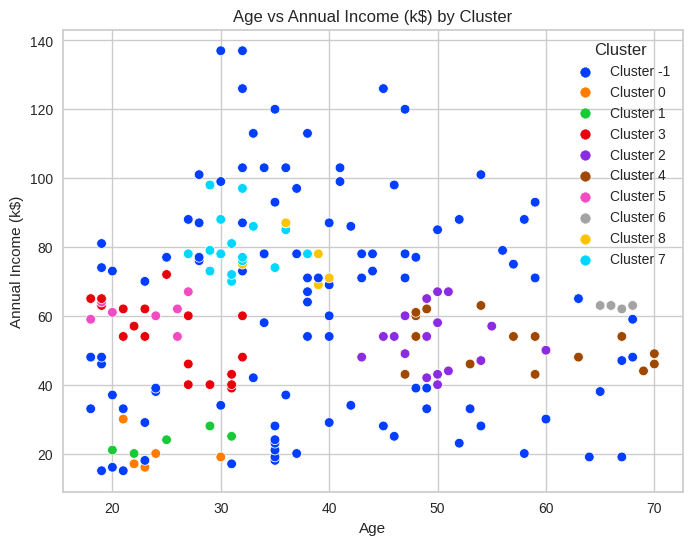

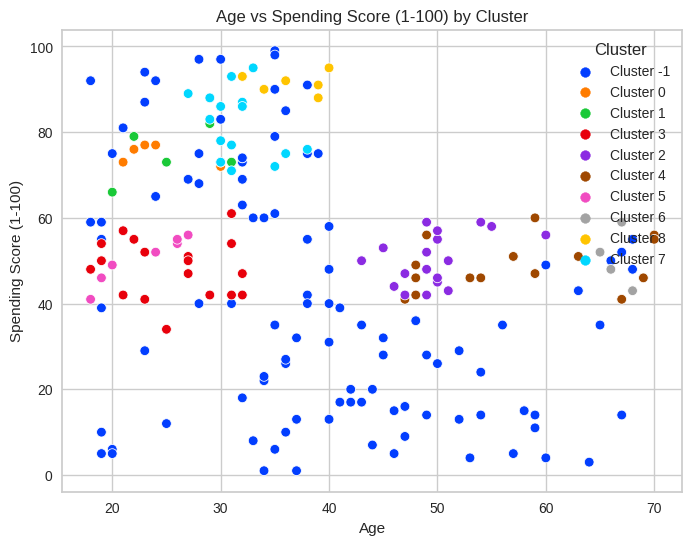

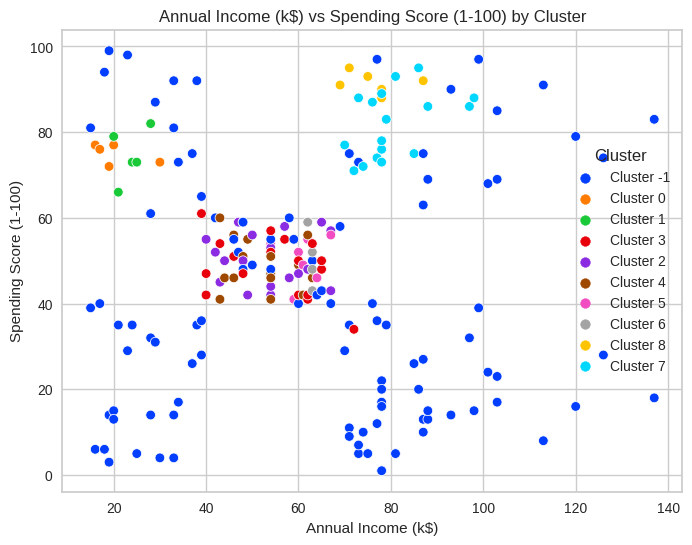

In [14]:
# Scatter Plots for each pair of features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=dbscan_results, x=features[i], y=features[j], hue='Cluster', palette='bright')
        plt.title(f'{features[i]} vs {features[j]} by Cluster')
        plt.show()

In [15]:
# t-SNE Visualization
from sklearn.manifold import TSNE

In [16]:
# Create a t-SNE model
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_results = tsne.fit_transform(dbscan_results[features])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 14.908652
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.941086
[t-SNE] KL divergence after 850 iterations: 0.195321


In [17]:
# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = dbscan_results['Cluster']

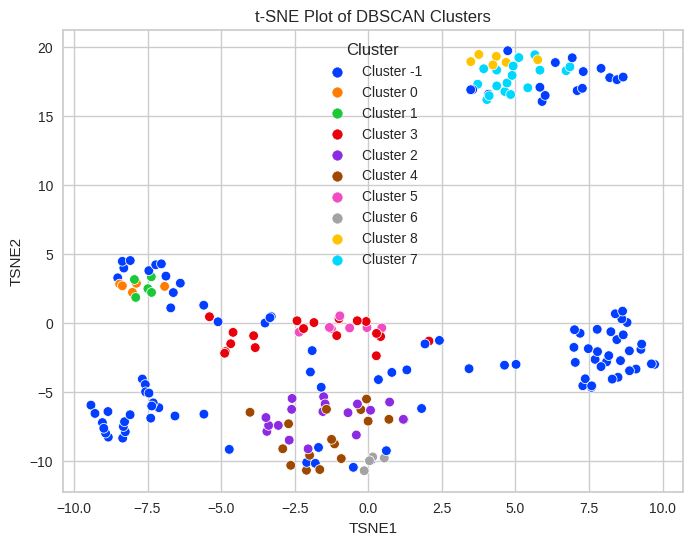

In [18]:
# Plot t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df, palette='bright')
plt.title('t-SNE Plot of DBSCAN Clusters')
plt.show()